# ICS 434: DATA SCIENCE FUNDAMENTALS

## Correlations

---

## Announcements

* Homework assignment #3
   * Due: **Thursday, March 30, 11:59 PM**
   * Refer to the `Homework submission guidelines` announcement in Laulima for preparing and submitting your homework.

## Slide Credits

Most of these slides were taken from Mahdi Belcaid.

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

### Correlations

* Given $n$ observation  from two random variables $X$ and $Y$ 
* We say that $X$ and $Y$ are correlated if knowledge of one helps better predict the other
  * The correlation coefficient between $X$ and $Y$ is a numerical value that measures the degree to which $Y$ is a function of $X$ (and vice-versa)

    
 


### Examples: 

* Weight is correlated with height (relatively strong positive correlation)
* The number of tourist in Waikiki is associated with the total sales at ABC stores (reasonably strong positive correlation)
* IQ and time to be required to solve simple logic problems (reasonably strong negative correlation)
* The number of daily cigarettes smoked and the number of years lived (reasonably strong negative correlation)
* The number of video games played and violent behavior score (very weak positive correlation, not easily reproduced)
  

### Linear Correlations

- Linear correlation ranges from -1 (_anti-correlated_) to 1  (_fully_ _correlated_) through 0 (_uncorrelated_)
- The most popular methods for computing linear correlation are:
  - Pearson's Correlation Coefficient ($R$)
  - Spearman's Rank Correlation $(\rho)$

### Positive Correlation and Deviation from the Means

<center><img src="images/correlation_distance_mean.png" alt="drawing" width="550"></center>

In [3]:
# Example where Y = x + 10
# Example of a deterministic relationship

X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

data = pd.DataFrame({"X": X, "Y": Y})
data

,X,Y
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19
9,10,20


In [4]:
print(data["X"].mean(), data["Y"].mean())

5.5 15.5


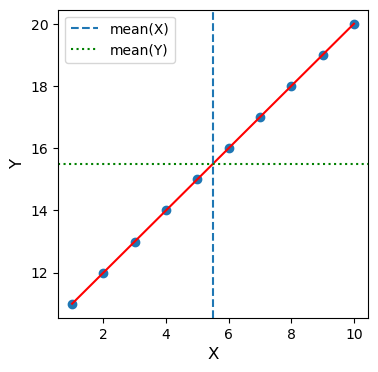

In [5]:
plt.figure(figsize=(4, 4))

plt.scatter(X, Y)
plt.plot(X, Y, color='r')

plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')
plt.legend();

 In the example above, both $X_i$ and $Y_i$ are increasing - $X$ and $Y$ are positively correlated

### Negative Correlation and Deviation from the Means

<center><img src="images/neg_corr_dist.png" alt="drawing" width="550"></center>

In [6]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

data = pd.DataFrame({"X": X, "Y": Y})
data

,X,Y
0,1,10
1,2,9
2,3,8
3,4,7
4,5,6
5,6,5
6,7,4
7,8,3
8,9,2
9,10,1


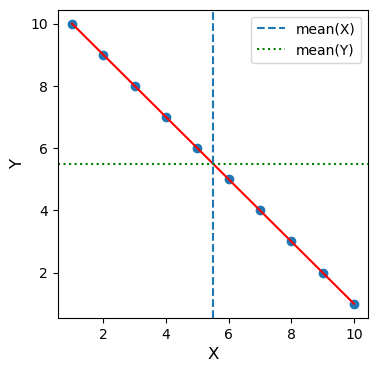

In [7]:
plt.figure(figsize=(4, 4))

plt.scatter(X, Y)
plt.plot(X, Y, color='r')

plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')
plt.legend();

 In the example above, $Y_i$ is decreasing when $X_i$ is increasing - $X$ and $Y$ are negatively correlated

### Lack of Correlation and Deviation from the Means

<center><img src="images/no_corr_distance.png" alt="drawing" width="550"></center>

In [8]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Y = [3, 8, 2, 5, 3, 6, 4, 1, 7]

data = pd.DataFrame({"X": X, "Y": Y})
data

,X,Y
0,1,3
1,2,8
2,3,2
3,4,5
4,5,3
5,6,6
6,7,4
7,8,1
8,9,7


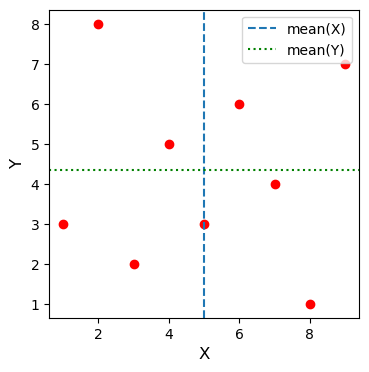

In [9]:
plt.figure(figsize=(4, 4))

plt.scatter(X, Y, color='r')

plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.axvline(data["X"].mean(), linestyle='--', label="mean(X)")
plt.axhline(data["Y"].mean(), linestyle=':', label="mean(Y)", color='green')
plt.legend();

### Covariance

* Measure of the tendency of tow variables to vary together

* Product of deviations: $(X_i-\overline{X})(Y_i-\overline{Y})$

  * Positive when the deviations have the same sign
  * Negative when the deviations have the opposite sign
  
* Adding up the products of deviations gives a measure of the tendency to vary together

  * Covariance is the average of these products:

$$
Cov(X, Y) = \frac{1}{n-1}\sum_{i=1}^{n}{\left(X_i-\overline{X}\right)\left(Y_i-\overline{Y}\right)}
$$


* Covariance is the dot product of the deviations, divided by their length
  
  * Maximized if the two vectors are identical, 0 if they are orthogonal, and negative if they point in opposite directions


### Pearson's Correlation Coefficient

* Covariance is useful in some computations, but it is seldom reported as a summary statistic

  * An issue: unit of the covariance is the product of the units of $X$ and $Y$ (e.g., pounds(weight)-inches(height))
  * A solution: compute the product of standard scores (deviations divided by the standard deviation)

$$
r_i = \frac{(X_i-\overline{X})}{\hat\sigma_X}\cdot\frac{(Y_i-\overline{Y})}{\hat\sigma_Y}
$$

* Pearson's Correlation Coefficient: the mean of the products above

$$
\begin{align}
R & = \frac{1}{n-1}\sum_{i=1}^{n}{r_i} = \frac{Cov(X, Y)}{\hat\sigma_X \cdot \hat\sigma_Y} \\
  & = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})}}{\sqrt{\sum_{i=1}^n{(X_i-\overline{X})^2}} \sqrt{\sum_{i=1}^n{(Y_i-\overline{Y})^2}}}
\end{align}
$$


### Computing the Correlation Coefficient

* Pearson's Correlation Coefficient:

$$
R = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})}}{\sqrt{\sum_{i-1}^n{(X_i-\overline{X})^2}} \sqrt{\sum_{i-1}^n{(Y_i-\overline{Y})^2}}}
$$


* If the correlation is positive: when $X$'s distance from its mean increases, $Y$'s distance from its mean increases as well 
* If the correlation is negative: when $X$'s distance from its mean increases, $Y$'s distance from its mean decreases (increases in the negative direction) or vice-versa 
* In the absence of correlation the contributions from $X$'s and $Y$'s cancel out. Therefore, the correlation tends toward 0


### Pearson's Correlation Coefficient -- Cont'd

$$
R = \frac{\sum_{i=1}^{n}{(X_i-\overline{X})(Y_i-\overline{Y})}}{\sqrt{\sum_{i=1}^n{(X_i-\overline{X})^2}} \sqrt{\sum_{i=1}^n{(Y_i-\overline{Y})^2}}}
$$
  
* The correlation is positive when the deviations of $X$ and $Y$ from their respective mean have the same sign
* The correlation is negative when the deviations of $X$ and $Y$ from their respective mean have the opposite sign
* In the absence of correlation the contributions from $X$'s and $Y$'s cancel out. Therefore, the correlation tends toward 0<br>
<br>
* Pearson's correlation coefficient measures how **in sync** are two variables $X$ and $Y$


### Pearson's Correlation Coefficient 

- Pearson's correlation coefficient measures how **in sync** are two variables $X$ and $Y$

- For two variables to be corrected:

   - If a value from $X$ is much bigger than its means, then we want the other one to be equivalently larger than its mean
   - If a value from $X$ is much smaller than its means, then we want the other one to be equivalently smaller than its mean 
   
- Two variables are not correlated (at least not according to the Pearson's Correlation Coefficient) when contributions are above the mean for $X$ and below the mean for $Y$ (or vice versa)

### Pearson's Correlation Coefficient: Examples

<img src="images/correlation_examples.png">

<center><small>https://en.wikipedia.org/wiki/Correlation</small></center>

### $R^2$ and the Explained Variance

* $R^2$, the coefficient of determination, is the square of the correlation coefficient
* The interpretation of $R^2$ is different from that of $R$

* Example:
  * The correlation between the number of hotel rooms sold in Waikiki and average daily sales at ABC stores also in Waikiki

In [10]:
daily_sales = pd.read_table("data/room_abc_sales.tsv", header=None)
daily_sales

,0,1
0,180,66649.07
1,181,71557.20
2,182,104553.23
3,183,146851.52
4,184,84260.95
...,...,...
2815,2995,153410.75
2816,2996,170248.67
2817,2997,158253.04
2818,2998,182130.50


In [11]:
print(daily_sales[1].mean())

120227.70596808528


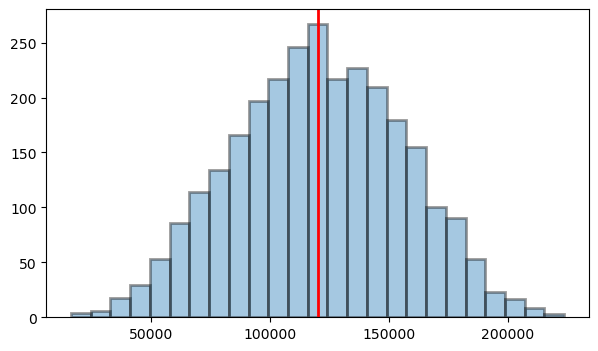

In [12]:
plt.figure(figsize=(7, 4))

plt.hist(daily_sales[1], bins=25, edgecolor="k", linewidth=2, alpha=0.4)
plt.axvline(daily_sales[1].mean(), color='r', linewidth=2);

### Question

* In the absence of any other information about ABC Store sales, what is your prediction for next Tuesday's sales?


### Sales Distribution

- Sales are normal with a mean $\mu=\$120,227$

* In the absence of any other information about the data, the mean is a good predictor of total daily sales
  * A good predictor compared to what?
    * Compare to prediction in the presence of other data. For example: 
      * Number of rooms sold in hotels around ABC stores 
      * Whether there are any special events
      * Whether it's a holiday, etc.
      * I.e., whether there is a correlated variable that can better predict sales

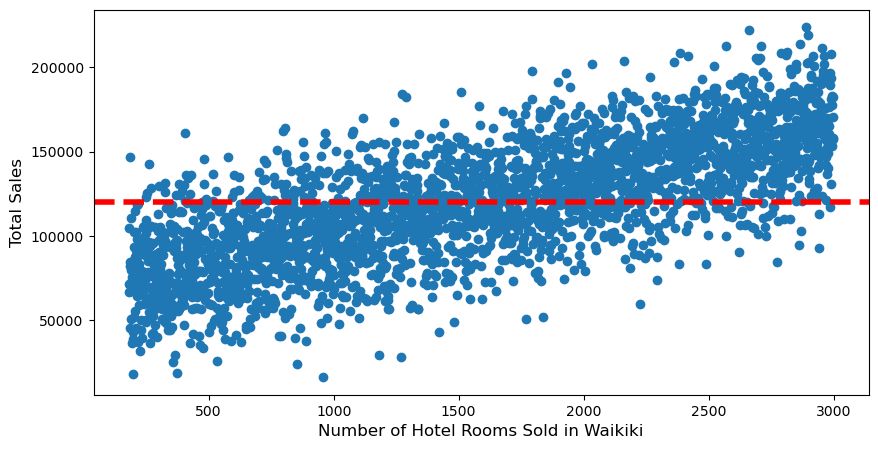

In [13]:
plt.figure(figsize=(10, 5))

plt.scatter(daily_sales[0], daily_sales[1])
plt.xlabel("Number of Hotel Rooms Sold in Waikiki", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.axhline(np.mean(daily_sales[1]), color='r', linestyle='--', linewidth=4);

### Regression Line

* In the presence of hotel rooms sold, the total sales value can be represented by the regression line
  * The line which best fits the data
  
* The regresison line is the model we believe explains the data

<center><img src="images/reg.png" alt="drawing" width="850"></center>

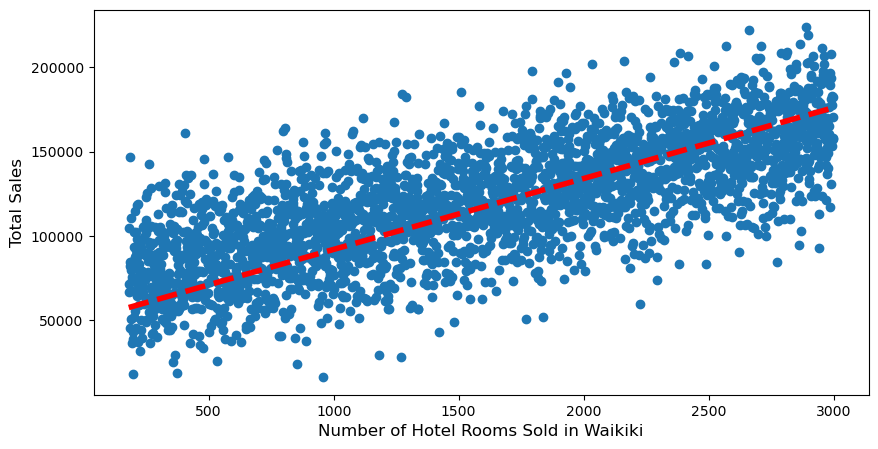

In [14]:
plt.figure(figsize=(10, 5))

plt.scatter(daily_sales[0], daily_sales[1])
plt.plot(daily_sales[0], 50000 + 42 * daily_sales[0], color='r', linewidth=4, linestyle='--')

plt.xlabel("Number of Hotel Rooms Sold in Waikiki", fontsize=12)
plt.ylabel("Total Sales", fontsize=12);

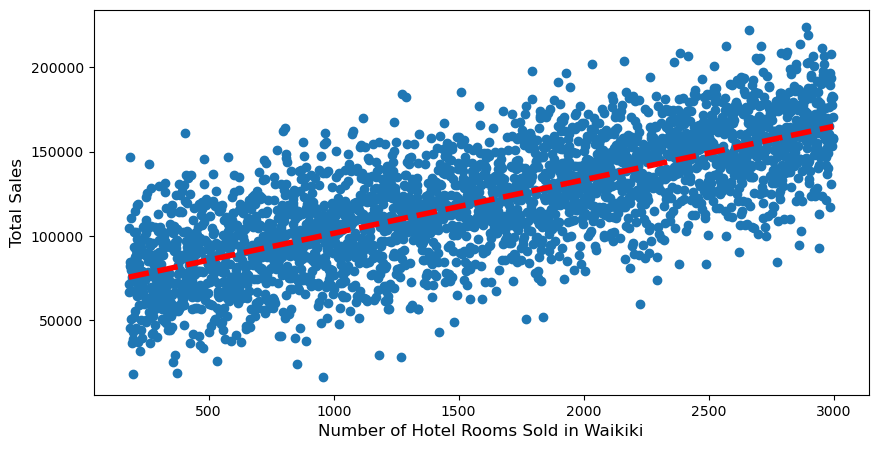

In [15]:
plt.figure(figsize=(10, 5))

plt.scatter(daily_sales[0], daily_sales[1])
plt.plot(daily_sales[0], 69843.88 + 31.69 * daily_sales[0], color='r', linewidth=4, linestyle='--')

plt.xlabel("Number of Hotel Rooms Sold in Waikiki", fontsize=12)
plt.ylabel("Total Sales", fontsize=12);

### What Are the Residuals

* A residual represents the difference between an observed value and a value estimated using the regression line

    * The error between the observed value and the predicted value

<center><img src="images/residuals.png" alt="drawing" width="500"/>


### Minimizing the Residuals

* Naturally, when predicting a quantity of interest, we want to find the method that minimizes the residuals

 * The total sum of all the residuals is the smallest possible
 
 * Thus, the model or red line above, should match as closely as possible on the points so that the residuals are small 

* What if we used the mean for our predictions?

### Mean vs. Regression Residuals

<center><img src="images/mean_vs_reg_residuals.png" alt="drawing" style="width:800px"/>

### Mean vs. Regression Residuals -- Cont'd

- The variance around the mean is just the natural variance in your data.

- The regression line is the line that best fits the data, i.e., minimizes the total sum of residuals. 

- Visually, we can confirm that the regression line fits the data better than the mean (black line).

### Mean vs. Regression Residuals -- Cont'd

* $R^2$ quantifies the difference between the best fitting line (the one that minimizes the sum of residuals) and the mean line.

  * Difference between the variance around the mean line and the variance around the regression line, normalized by the variance around the mean line
 
<center><img src="images/mean_vs_reg_residuals_2.png" alt="drawing" style="width:800px"/></center>

### Mean vs. Regression Residuals -- Cont'd

* We normalize by $\sigma^2_{mean\_line}$ so that the $R^2$ is constrained to the interval [0, 1]

  *  $\sigma^2_{red\_line}$ will never be greater than $\sigma^2_{mean\_line}$ 


In [16]:
from scipy import stats

print(stats.pearsonr(daily_sales[0], daily_sales[1]))
print(stats.pearsonr(daily_sales[0], daily_sales[1])[0] ** 2)

PearsonRResult(statistic=0.7262702431699775, pvalue=0.0)
0.5274684661141782


In [17]:
var_mean = np.sum((daily_sales[1] - np.mean(daily_sales[1]))**2)

print(var_mean)

3559841164665.26


In [18]:
predicted_val = 69843.88 + 31.69 * np.array(daily_sales[0])
var_red_line = np.sum((daily_sales[1] - predicted_val)**2)
print(var_red_line)

1682137768328.9448


In [19]:
(var_mean - var_red_line) / var_mean

0.5274683081296634

### Variance Explained

* The data show a 0.726 correlation between the number of hotel rooms sold and the ABC store's daily sales

  * $R = 0.726$ then $R^2 =R \times R = 0.527$ 


* Regression line explains approximately $53\%$ of the variance in the data
 * We understand $53\%$ of what drives the sales at the ABC store
   
* In the absence of additional explanatory variables, the number of hotel rooms sold in Waikiki is a good predictor of total sales in Waikiki's ABC store
    * Additional explanatory variables could perhaps explain more variance in the ABC store's daily sales
    
* It certainly is better than just taking the mean as a predictor
    

### Significance and the Variance Explained

* If the variance explained ($R^2$) is low, then $X$ is most likely not a good predictor of $Y$ in the context of a linear model
  * This does not say anything about non-linear models
  
  
*  In real-life, you are likely to have other `explanatory variables` that could help you to account for a more considerable variance
   * Leads to better models with less total residuals
   
* For instance, for the ABC store sales data, you may have access to weather data
    - If it's raining and cold, tourists are less likely to go shopping so including the effect of rain, in addition to hotel room occupancy, can produce a more accurate model for ABC store sales than room occupancy alone.
    - Similarly, events in Waikiki may increase sales 
    - etc.
    
* More on multiple linear regression later

### Significance and the Variance Explained

* If the variance explained ($R^2$) is low, then $X$ is most likely not a good predictor of $Y$ in the context of a linear model
  * This does not say anything about non-linear models
  
  
*  In real-life, you are likely to have other `explanatory variables` that could help you to account for a more considerable variance
   * Leads to better models with less total residuals
   
* For instance, for the ABC store sales data, you may have access to weather data
    - If it's raining and cold, tourists are less likely to go shopping so including the effect of rain, in addition to hotel room occupancy, can produce a more accurate model for ABC store sales than room occupancy alone.
    - Similarly, events in Waikiki may increase sales 
    - etc.

### Spearman's Rank Correlation

- The Spearman's rank correlation is similar to the Pearson's correlation coefficient but with rank data

- Counts the number of disordered pairs, not how well the data fits a line

- Better with non-linear relationships and outliers

### Spearman's Rank Correlation

- The Spearman's rank correlation is similar to the Pearson's correlation coefficient but with rank data

- Counts the number of disordered pairs, not how well the data fits a line

- Better with skewed distributions or outliers

### Spearman's Rank Correlation -- Cont'd

- Let $rank_{x_i}$ be the rank position of $x_i$ in sorted order
  - $rank_{x_i}$ ranges from 1 to $n$
  
 $$
 \large
 \rho = 1 - \frac{6 \sum(rank_{x_i} - rank_{y_i})}{n (n^2 -1)}
 $$
 

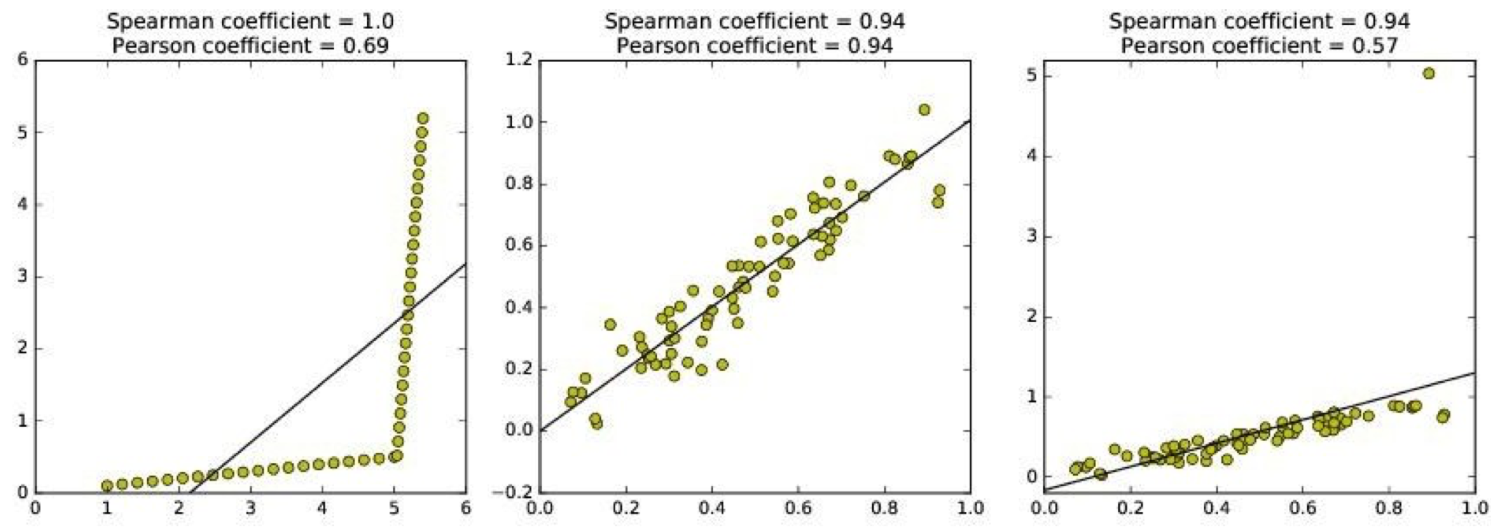

In [20]:
Image("images/spearman.png")

### Spearman's Rank Correlation -- Cont'd

- Let $rank_{x_i}$ be the rank position of $x_i$ in sorted order
  - $rank_{x_i}$ ranges from 1 to $n$
  
$$
 \large
 \rho = 1 - \frac{6 \sum(rank_{x_i} - rank_{y_i})^2}{n (n^2 -1)}
$$

<center><img src="images/spearman.png"/>

### Correlation and Causation

- Correlation does not imply causation.

* Examples: 
  - The number of policemen active in a precinct  correlated strongly with the local crime rate, but the police do not cause the crime.
  - If we collect data for the total number of Master’s degrees issued by universities each year and the total box office revenue generated by year, we would find that the two variables are highly correlated.
    * Global population has been increasing each year 
      * Leading to more Master’s degrees being issued 
      * Leading to more people attending movies each year 
      * Both increase in roughly equal amounts


[https://www.statology.org/correlation-does-not-imply-causation-examples/](https://www.statology.org/correlation-does-not-imply-causation-examples/)

## Statistical Significance
  
* Data miners are primarily concerned with  whether their observations are interesting

* Statisticians are primarily concerned with whether observations on data are significant

  * As we discussed, something is statistically significant if the odds of it happening by chance are rare
  * Less than 1 in 20 (probability of the event is less than 0.05)


### Statistical Significance
  
* Statisticians are primarily concerned with whether observations on data are significant

  * As we discussed, something is statistically significant if the odds of it happening by chance are rare
  * Less than 1 in 20 (probability of the event is less than 0.05)


### Interpreting Correlation Significance

* Statistical significance of a correlation measures how likely it is for data to be correlated just by chance

* Depends on the sample size and the real underlying correlation coefficient

  * Two data points are always correlated ($R=1$) 
  * Much larger dataset are less likely to be correlated just by chance
  
* Using bootstrapping, we can build our own background distribution of correlation coefficients, which we can use to assess  the statistical significance of any given correlation value

In [21]:
from scipy import stats

x = np.random.randint(0, 100, 10)
y = np.random.randint(0, 100, 10)

stats.pearsonr(x, y)[0]

0.30637668451673106

In [22]:
print(x)
print(y)
stats.pearsonr(x, y)

[82 23 55 50 38 30 59 36 72 19]
[57 24 93 93 81 91 95 93 98 66]


PearsonRResult(statistic=0.30637668451673106, pvalue=0.38924648227201136)

In [23]:
positions = np.random.choice(range(10), size=10, replace=True)

print(positions)

[2 9 0 7 6 2 1 9 2 9]


In [24]:
x[positions]

array([55, 19, 82, 36, 59, 55, 23, 19, 55, 19])

In [25]:
np.abs(stats.pearsonr(x[positions], y[positions])[0])

0.39109883059065476

In [26]:
corr_ = []

for _ in range(100000):
    positions = np.random.choice(range(10), size=10, replace=True)
    corr_.append(np.abs(stats.pearsonr(x[positions], y[positions])[0]))

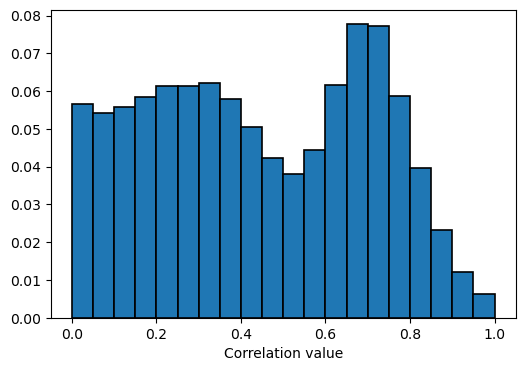

In [27]:
plt.figure(figsize=(6, 4))

weights = np.ones_like(corr_)/float(len(corr_))
plt.hist(corr_, bins=20, weights=weights, edgecolor='black', linewidth=1.2)

plt.xlabel("Correlation value");

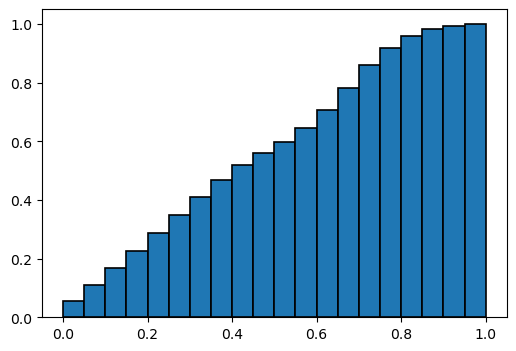

In [28]:
plt.figure(figsize=(6, 4))

_ = plt.hist(corr_, bins=20, weights=weights, cumulative=True, edgecolor='black', linewidth=1.2)

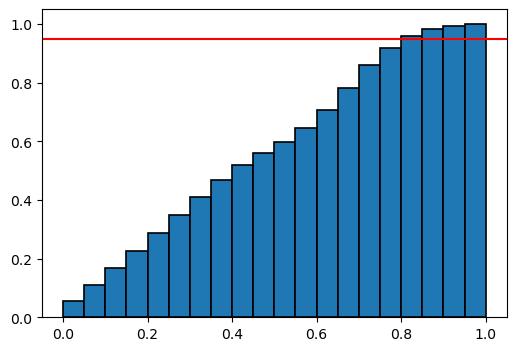

In [29]:
plt.figure(figsize=(6, 4))

plt.hist(corr_, bins=20, weights=weights, cumulative=True, edgecolor='black', linewidth=1.2)
plt.axhline(1 - 0.05, color="r");

In [30]:
np.quantile(corr_, 0.90)

0.7829147365327022

In [31]:
np.quantile(corr_, 0.95)

0.8373281379333506

In [32]:
# def simulate_corr(n=10, nb_repeats=1000, p=1/20):
#     corr_ = []
    
#     for _ in range(nb_repeats):
#         x = np.random.randint(0, 100, n)
#         y = np.random.randint(0, 100, n)
#         corr_.append(np.abs(stats.pearsonr(x, y)[0]))
#     return (np.quantile(corr_, (0, 1-p)[1]), max(corr_))

In [33]:
def simulate_corr(n=10, nb_repeats=1000, p=1/20):
    corr_ = []
    
    for _ in range(nb_repeats):
        x = np.random.randint(0, 100, n)
        y = np.random.randint(0, 100, n)
        corr_.append(np.abs(stats.pearsonr(x, y)[0]))
    return (np.quantile(corr_, 1-p), max(corr_))

In [34]:
simulate_corr(n=10, nb_repeats=100000, p=1/20)

(0.6335936160788266, 0.9552391232760826)

In [35]:
sample_size = np.arange(10, 1010, 10)
max_common_corr = []
max_corr = []

for n in sample_size:
    max_c_r, max_r = simulate_corr(n, nb_repeats=10000)
    max_common_corr.append(max_c_r)
    max_corr.append(max_r)

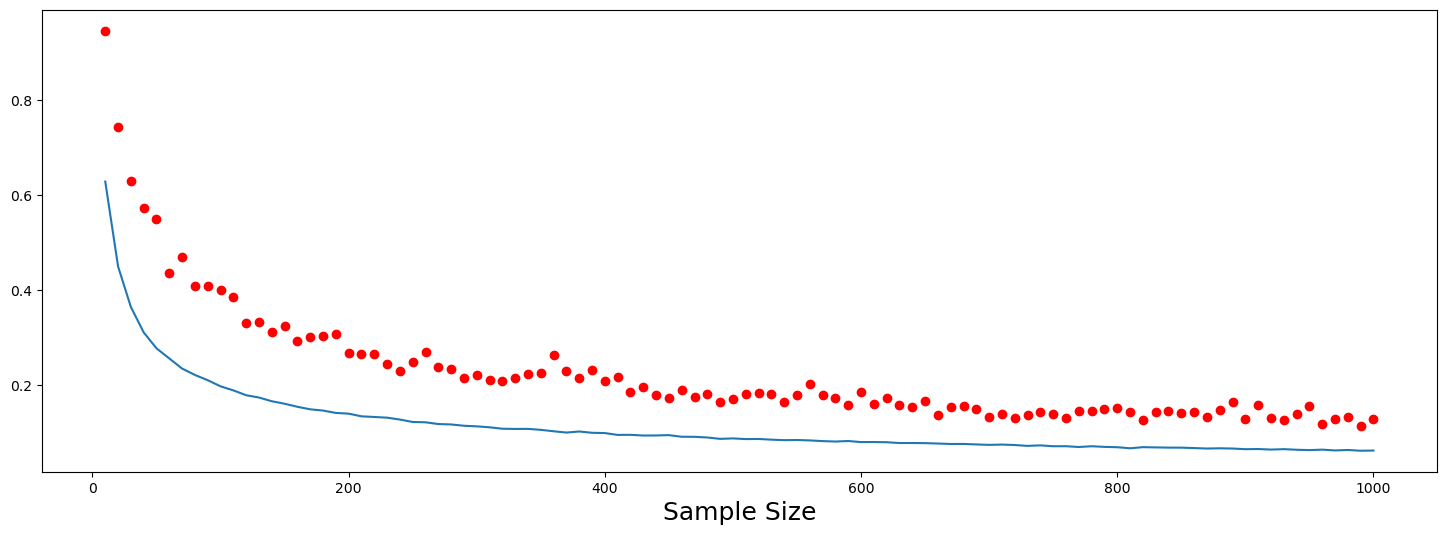

In [36]:
plt.figure(figsize=(18, 6))
plt.plot(sample_size, max_common_corr)
plt.scatter(sample_size, max_corr, color="red")
plt.xlabel("Sample Size", fontsize=18);

### Statistical Significance vs. Interestingness

* There is a difference between $R$ value greater than what would be expected by chance (statistical perspective) and $R$ value that is interesting
  * Data scientists are primarily concerned with whether their observations are interesting from a business domain perspective

* Given enough variables, one can find a lot of statistically significant correlations
  * Given the monthly sales for 1,000 Amazon products you are very likely to find various correlations that are significant
  * 1,000 products means $\frac{n\cdot (n-1)}{2}=\frac{1000\cdot 999}{2}=499,500$ comparisons

* It does not mean that all statistically significant correlations are interesting
  * Ex. Increase in sales of diapers is correlated with increase in sales of windshield wipers
  
* This is usually common with big data


### Spurious Correlations or Wrong Hypotheses

- However, the above applies if we test a single pair of variable $X$ and $Y$. 
  - Similarly, our reasoning about hypothesis testing applies primarily to single test (two competing hypothesis). 

- The logic changes if we are comparing a much larger set of hypothesis or if we are computing correlation on a large number of random variables.

- In a large number of trials, even low rates of Type I (false positive) and Type II (false negative) errors can have a significant impact on the results
  - False positives and false negatives are rare
    - How rare will depend on the population's shape
    - In the normal, you can expect a false positive rate of about 0.05
  - A low probability outcome will occur if we repeat the experiment a large number of times


### Multiple Testing Hypothesis

Ex. In a large dataset with 200 variables, for instance, in a medical expertiment, for each patient one can record:
  - Age
  - Blood analysis:
    - Complete blood count (CBC)
    - High density lipoprotein (HDL)
    - Low density lipoprotein (LDL)
    - White blood cell count
    - Red blood cell count
    - ...
  - Immune system status
    - Number of leukocytes
    - Cytokine levels in serum
    - ...
  - Genetic background
  - Number of cigarettes in last month
  - Number of alcoholic drinks in last month
  - Number of times used drugs in last month
  - Number of surgical operations in last year
  - Number of medications taken
  - Number of hospital visits
  - ...

### Multiple Testing Hypothesis -- Cont'd

- In a relatively large dataset with 200 variables, one can test:
    - $n (n-1) / 2$ possible correlations
    - $(200 * 199) / 2 = 19,900$ possible correlations

- If the event of a correlation arising by chance is very rare; say 0.001
  - Then in a dataset with ~20K correlations, we would expect ~20 correlations to have arisen by chance
- If the false positive rate is 0.01, which is a very reasonable approximation, then you should expect ~200 correlations to have arisen by chance
  - That's a concerning number!

### Multiple Testing Hypothesis -- Cont'd

- In the Medicaid dataset, you could compare all medication usage between the east cost and the west coast
  - Is there a difference between east coast and west coast of PENICILLIN use?
  - Is there a difference between east coast and west coast of ASPIRIN use?
  - Is there a difference between east coast and west coast of OXYCODONE use?
  - Is there a difference between east coast and west coast of ACETAMINOPHEN use?...
  
- In such a large number of tests, Type I and Type II errors will most likely occur.
  * Type I error (false-positive): rejecting a null hypothesis that is actually true
  * Type II error (false-negative): failure to reject a null hypothesis that is actually false

### Mutiple Testing Correction

- What we need is a way to identify and remove those $p$-values which significance is only due to chance
  - In a way, we need to correct for all the tests we are carrying out


In [37]:
test_pvalues = []
for i in range(10_000):
    group_1 = sp.stats.norm(177, 7).rvs(30)
    group_2 = sp.stats.norm(177, 7).rvs(30)
    test_pvalues.append(sp.stats.ttest_ind(group_1, group_2)[1])

In [38]:
test_pvalues[0:10]

[0.936502261583837,
 0.2874389448614667,
 0.19642264785644536,
 0.7584974967183304,
 0.30123553735000286,
 0.7793325468084767,
 0.3053651810956311,
 0.6923047599914707,
 0.4666047214489749,
 0.21483300382781303]

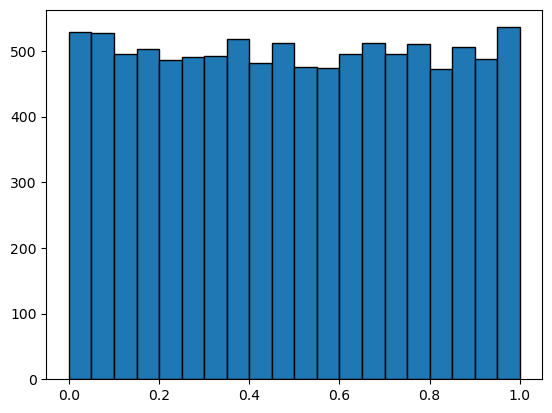

In [39]:
_ = plt.hist(test_pvalues, bins=20, edgecolor='black')

In [40]:
print("Out of 10,000 tests, the number of false positives is %s "  % sum(np.array(test_pvalues) < 0.05))

Out of 10,000 tests, the number of false positives is 529 


In [41]:
test_pvalues = []
for i in range(10_000):
    group_1 = sp.stats.norm(177, 7).rvs(30)
    group_2 = sp.stats.norm(174, 4).rvs(30)
    test_pvalues.append(sp.stats.ttest_ind(group_1, group_2)[1])

In [42]:
test_pvalues[0:10]

[0.008751040799968818,
 0.028156373636879676,
 0.1587706163331851,
 0.09256548258730155,
 0.00020397817327602686,
 0.0007003507983823706,
 0.5015209815841042,
 0.16975957001848369,
 0.05991793698795084,
 0.11836354848575703]

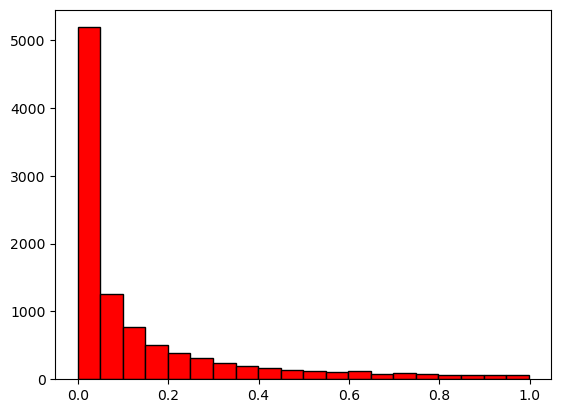

In [43]:
_ = plt.hist(test_pvalues, bins=20, color='r', edgecolor='black')

In [44]:
print("Out of 10,000 tests, the number of false negatives is %s "  % sum(np.array(test_pvalues) > 0.05))

Out of 10,000 tests, the number of false negatives is 4805 


- How can you decrease the number of false negatives?

- What you observe when you do tests on a large population is the sum of these two effects.
 - If you differences in medication usage between east coast and west coast you will see.
    - Drugs with the same distributions (prescribes similarly in both regions )
    - Drugs with the different distributions (different prescription patterns across in both regions)